# Muhammad Rizki Mardanu Hilman

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import math
from folium.plugins import FastMarkerCluster
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_auc_score

In [ ]:
df = pd.read_csv('pakwheels-11Jul2020.csv')
df.sample(5)

,Ad No,Name,Price,Model Year,Location,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Features,Last Updated,URL
40581,4058210,Honda Civic EXi 2002,850000.0,2002,"Bahria Town Rawalpindi, Rawalpindi Punjab",116000,Karachi,Petrol,1500 cc,Manual,Silver,Local,Sedan,"AM/FM Radio, Air Conditioning, Immobilizer Ke...","May 28, 2020",https://www.pakwheels.com/used-cars/honda-civi...
12061,4151490,Suzuki Jimny 2012,1885000.0000000002,2012,"Abbot Road, Lahore Punjab",650000,Lahore,Petrol,660 cc,Automatic,White,Imported,NaN,NaN,"Jul 05, 2020",https://www.pakwheels.com/used-cars/suzuki-jim...
1687,4166505,Toyota Prado TX Limited 2.7 1991,1825000.0,1991,"Shiekh Maltoon Town, Mardan KPK",120000,Islamabad,Petrol,2700 cc,Automatic,Maroon,Imported,SUV,"AM/FM Radio, Air Conditioning, Alloy Rims, Na...","Jul 11, 2020",https://www.pakwheels.com/used-cars/toyota-pra...
51101,3963501,Toyota Premio F 1.5 2010,Call for price,2010,Rahim Yar Khan Punjab,76500,Karachi,Petrol,1500 cc,Automatic,Black,Imported,Sedan,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...","Mar 19, 2020",https://www.pakwheels.com/used-cars/toyota-pre...
5524,4162302,Suzuki Every 2014,1225000.0,2014,Rawalpindi Punjab,70640,Islamabad,Petrol,660 cc,Manual,White,Imported,NaN,NaN,"Jul 09, 2020",https://www.pakwheels.com/used-cars/suzuki-eve...


In [ ]:
# pengelompokan kolom berdasarkan typedata (numerikal & kategorikal)
df.select_dtypes(exclude='object').columns
df.select_dtypes(include='object').columns
nums = df.select_dtypes(exclude='object').columns
cats = df.select_dtypes(include='object').columns

In [ ]:
cats

Index(['Name', 'Price', 'Location', 'Registered City', 'Engine Type',
       'Engine Capacity', 'Transmission', 'Color', 'Assembly', 'Body Type',
       'Features', 'Last Updated', 'URL'],
      dtype='object')

In [ ]:
nums

Index(['Ad No', 'Model Year', 'Mileage'], dtype='object')

# Data Preprocessing Part 1

In [ ]:
# melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56186 entries, 0 to 56185
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ad No            56186 non-null  int64 
 1   Name             56186 non-null  object
 2   Price            56186 non-null  object
 3   Model Year       56186 non-null  int64 
 4   Location         56186 non-null  object
 5   Mileage          56186 non-null  int64 
 6   Registered City  56186 non-null  object
 7   Engine Type      54904 non-null  object
 8   Engine Capacity  56186 non-null  object
 9   Transmission     56186 non-null  object
 10  Color            56186 non-null  object
 11  Assembly         56186 non-null  object
 12  Body Type        49717 non-null  object
 13  Features         50765 non-null  object
 14  Last Updated     56186 non-null  object
 15  URL              56186 non-null  object
dtypes: int64(3), object(13)
memory usage: 6.9+ MB


In [ ]:
 # melihat statistik deskriptif pada data
df.describe()

,Ad No,Model Year,Mileage
count,5.618600e+04,56186.000000,56186.000000
mean,4.066148e+06,2010.904353,91207.142954
std,1.784503e+05,6.541181,63843.801042
min,1.338100e+04,1990.000000,1.000000
25%,4.049512e+06,2007.000000,49000.000000
50%,4.101881e+06,2013.000000,80000.000000
75%,4.141764e+06,2016.000000,120000.000000
max,4.168339e+06,2019.000000,999999.000000


In [ ]:
df[cats].describe()

,Name,Price,Location,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Features,Last Updated,URL
count,56186,56186,56186,56186,54904,56186,56186,56186,56186,49717,50765,56186,56186
unique,7328,1511,2143,136,3,118,2,24,2,18,4940,661,56186
top,Honda Civic Oriel 1.8 i-VTEC CVT 2017,Call for price,Lahore Punjab,Lahore,Petrol,1000 cc,Manual,White,Local,Hatchback,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...","Jul 11, 2020",https://www.pakwheels.com/used-cars/toyota-vit...
freq,382,1272,2679,19989,50840,11401,28134,21698,34586,22032,2339,2096,1


In [ ]:
# melihat data duplikat
df.duplicated().sum()

0

In [ ]:
missing = []
unique = []
types = []
variables = []
count = []
duplicated =[]

for item in df.columns :
    variables.append(item)
    missing.append(df[item].isnull().sum())
    unique.append(df[item].nunique())
    types.append(df[item].dtypes)
    count.append(len(df[item]))
    duplicated.append(df[item].duplicated().sum())

output = pd.DataFrame({
    'variable': variables,
    'dtype': types,
    'count': count,
    'unique': unique,
    'missing': missing,
    'duplicated' : duplicated,
})
output.sort_values("missing",ascending=False).reset_index(drop=True)

,variable,dtype,count,unique,missing,duplicated
0,Body Type,object,56186,18,6469,56167
1,Features,object,56186,4940,5421,51245
2,Engine Type,object,56186,3,1282,56182
3,Ad No,int64,56186,56186,0,0
4,Name,object,56186,7328,0,48858
5,Price,object,56186,1511,0,54675
6,Model Year,int64,56186,30,0,56156
7,Location,object,56186,2143,0,54043
8,Mileage,int64,56186,6644,0,49542
9,Registered City,object,56186,136,0,56050


In [ ]:
# Remove categorial column that have huge unique value
df.drop(columns=['Ad No', 'Name', 'Location', 'Features', 'URL', 'Last Updated'], inplace=True)
df.head()

,Price,Model Year,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type
0,2385000.0,2017,9869,Un-Registered,Petrol,1000 cc,Automatic,Silver,Imported,Hatchback
1,111000.00000000001,2019,11111,Islamabad,Petrol,1300 cc,Automatic,White,Local,Sedan
2,1530000.0,2019,17500,Un-Registered,Petrol,660 cc,Automatic,White,Local,Hatchback
3,1650000.0,2019,9600,Lahore,Petrol,660 cc,Manual,White,Local,Hatchback
4,1435000.0,2010,120000,Islamabad,Petrol,1300 cc,Manual,Black,Local,Sedan


In [ ]:
# Remove 'cc' suffix
df['Engine Capacity'] = df['Engine Capacity'].str.replace('cc', '')
df.head()

,Price,Model Year,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type
0,2385000.0,2017,9869,Un-Registered,Petrol,1000,Automatic,Silver,Imported,Hatchback
1,111000.00000000001,2019,11111,Islamabad,Petrol,1300,Automatic,White,Local,Sedan
2,1530000.0,2019,17500,Un-Registered,Petrol,660,Automatic,White,Local,Hatchback
3,1650000.0,2019,9600,Lahore,Petrol,660,Manual,White,Local,Hatchback
4,1435000.0,2010,120000,Islamabad,Petrol,1300,Manual,Black,Local,Sedan


In [ ]:
df['Price'].sample(10)

53303    1120000.0
25874     550000.0
20356    1975000.0
6287     1529000.0
17353     450000.0
26752     600000.0
12663    1550000.0
29873     620000.0
11461    3350000.0
17997     675000.0
Name: Price, dtype: object

In [ ]:
non_numeric_prices = df[~pd.to_numeric(df['Price'], errors='coerce').notna()]
print(non_numeric_prices)

                Price  Model Year  Mileage Registered City Engine Type  \
87     Call for price        2019    24000         Karachi      Petrol   
89     Call for price        2014    77000         Karachi      Petrol   
93     Call for price        2015    65000         Karachi      Petrol   
97     Call for price        2014   129000         Karachi      Petrol   
117    Call for price        2019     8600         Karachi      Petrol   
...               ...         ...      ...             ...         ...   
55999  Call for price        2017    47000   Un-Registered      Petrol   
56000  Call for price        2015    63500         Karachi      Petrol   
56076  Call for price        2014    59300   Un-Registered      Hybrid   
56158  Call for price        2016    12985   Un-Registered      Petrol   
56184  Call for price        2015    45000   Un-Registered      Hybrid   

      Engine Capacity Transmission     Color  Assembly  Body Type  
87              1600     Automatic     Whit

In [ ]:
# Convert 'Engine Capacity' column to integer
df['Engine Capacity'] = df['Engine Capacity'].astype(int)

# Convert 'Price' column to integer and remove 'Call for Price'
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'] = df['Price'].astype(float)
df.dtypes

Price              float64
Model Year           int64
Mileage              int64
Registered City     object
Engine Type         object
Engine Capacity      int64
Transmission        object
Color               object
Assembly            object
Body Type           object
dtype: object

In [ ]:
missing = []
unique = []
types = []
variables = []
count = []
duplicated =[]

for item in df.columns :
    variables.append(item)
    missing.append(df[item].isnull().sum())
    unique.append(df[item].nunique())
    types.append(df[item].dtypes)
    count.append(len(df[item]))
    duplicated.append(df[item].duplicated().sum())

output = pd.DataFrame({
    'variable': variables,
    'dtype': types,
    'count': count,
    'unique': unique,
    'missing': missing,
    'duplicated' : duplicated,
})
output.sort_values("missing",ascending=False).reset_index(drop=True)

,variable,dtype,count,unique,missing,duplicated
0,Body Type,object,56186,18,6469,56167
1,Engine Type,object,56186,3,1282,56182
2,Price,float64,56186,1509,1273,54676
3,Model Year,int64,56186,30,0,56156
4,Mileage,int64,56186,6644,0,49542
5,Registered City,object,56186,136,0,56050
6,Engine Capacity,int64,56186,118,0,56068
7,Transmission,object,56186,2,0,56184
8,Color,object,56186,24,0,56162
9,Assembly,object,56186,2,0,56184


## The task involves grouping the 'Registered City' based on its unique values into several clusters.

In [ ]:
df['Registered City'].unique()

array(['Un-Registered', 'Islamabad', 'Lahore', 'Rawalpindi', 'Karachi',
       'Multan', 'Faisalabad', 'Sialkot', 'Peshawar', 'Gujranwala',
       'Sargodha', 'Attock', 'Bahawalpur', 'Lower Dir', 'Chakwal',
       'Jehlum', 'Kahuta', 'Abottabad', 'Shiekhopura', 'Shikar pur',
       'Shaikhupura', 'Nowshera', 'Jhang', 'Kohat', 'Lodhran',
       'Khair Pur Mirs', 'Khushab', 'Hyderabad', 'Mirpur A.K.', 'Vehari',
       'Narowal', 'Mansahra', 'Muzaffar Gargh', 'Dera ismail khan',
       'Dadu', 'Toba Tek Singh', 'Swat', 'Nawabshah', 'Okara',
       'Mirpur khas', 'Rahim Yar Khan', 'Quetta', 'Gujrat',
       'Pak pattan sharif', 'Sanghar', 'Sahiwal', 'Hunza', 'Larkana',
       'Mardan', 'Hari pur', 'Nankana sahib', 'Gilgit', 'Chichawatni',
       'Mandi bahauddin', 'Wah cantt', 'Liaqat Pur', 'Hub-Balochistan',
       'Mian Wali', 'Khanewal', 'Karore lalisan', 'Gujar Khan',
       'Sadiqabad', 'Layyah', 'Karak', 'Bahawal Nagar', 'D.G.Khan',
       'Sukkur', 'Ahmed Pur East', 'Bhakkar', 'Sawa

In [ ]:
# Define the function to segment the cities

def segment_city(city):
    if city in ['Islamabad', 'Lahore', 'Rawalpindi', 'Karachi', 'Multan', 'Faisalabad']:
        return 'Metropolitan'
    elif city in ['Peshawar', 'Gujranwala', 'Sialkot']:
        return 'Major City'
    elif city in ['Sargodha', 'Hyderabad', 'Quetta']:
        return 'City'
    else:
        return 'Other'

df['Registered City'] = df['Registered City'].apply(segment_city)

In [ ]:
df['Registered City']

0               Other
1        Metropolitan
2               Other
3        Metropolitan
4        Metropolitan
             ...     
56181    Metropolitan
56182    Metropolitan
56183    Metropolitan
56184           Other
56185      Major City
Name: Registered City, Length: 56186, dtype: object

<Axes: >

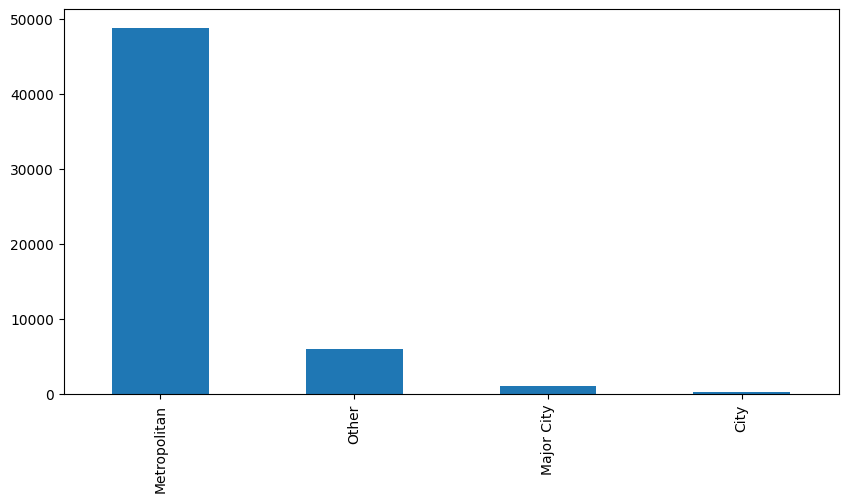

In [ ]:
plt.figure(figsize=(10,5))
df['Registered City'].value_counts().plot(kind='bar')

# Exploratory Data Analysis

In [ ]:
# pengelompokan kolom berdasarkan typedata (numerikal & kategorikal)
df.select_dtypes(exclude='object').columns
df.select_dtypes(include='object').columns
num_vars = df.select_dtypes(exclude='object').columns
cat_vars = df.select_dtypes(include='object').columns

In [ ]:
cat_vars

Index(['Registered City', 'Engine Type', 'Transmission', 'Color', 'Assembly',
       'Body Type'],
      dtype='object')

In [ ]:
num_vars

Index(['Price', 'Model Year', 'Mileage', 'Engine Capacity'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56186 entries, 0 to 56185
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            54913 non-null  float64
 1   Model Year       56186 non-null  int64  
 2   Mileage          56186 non-null  int64  
 3   Registered City  56186 non-null  object 
 4   Engine Type      54904 non-null  object 
 5   Engine Capacity  56186 non-null  int64  
 6   Transmission     56186 non-null  object 
 7   Color            56186 non-null  object 
 8   Assembly         56186 non-null  object 
 9   Body Type        49717 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 4.3+ MB


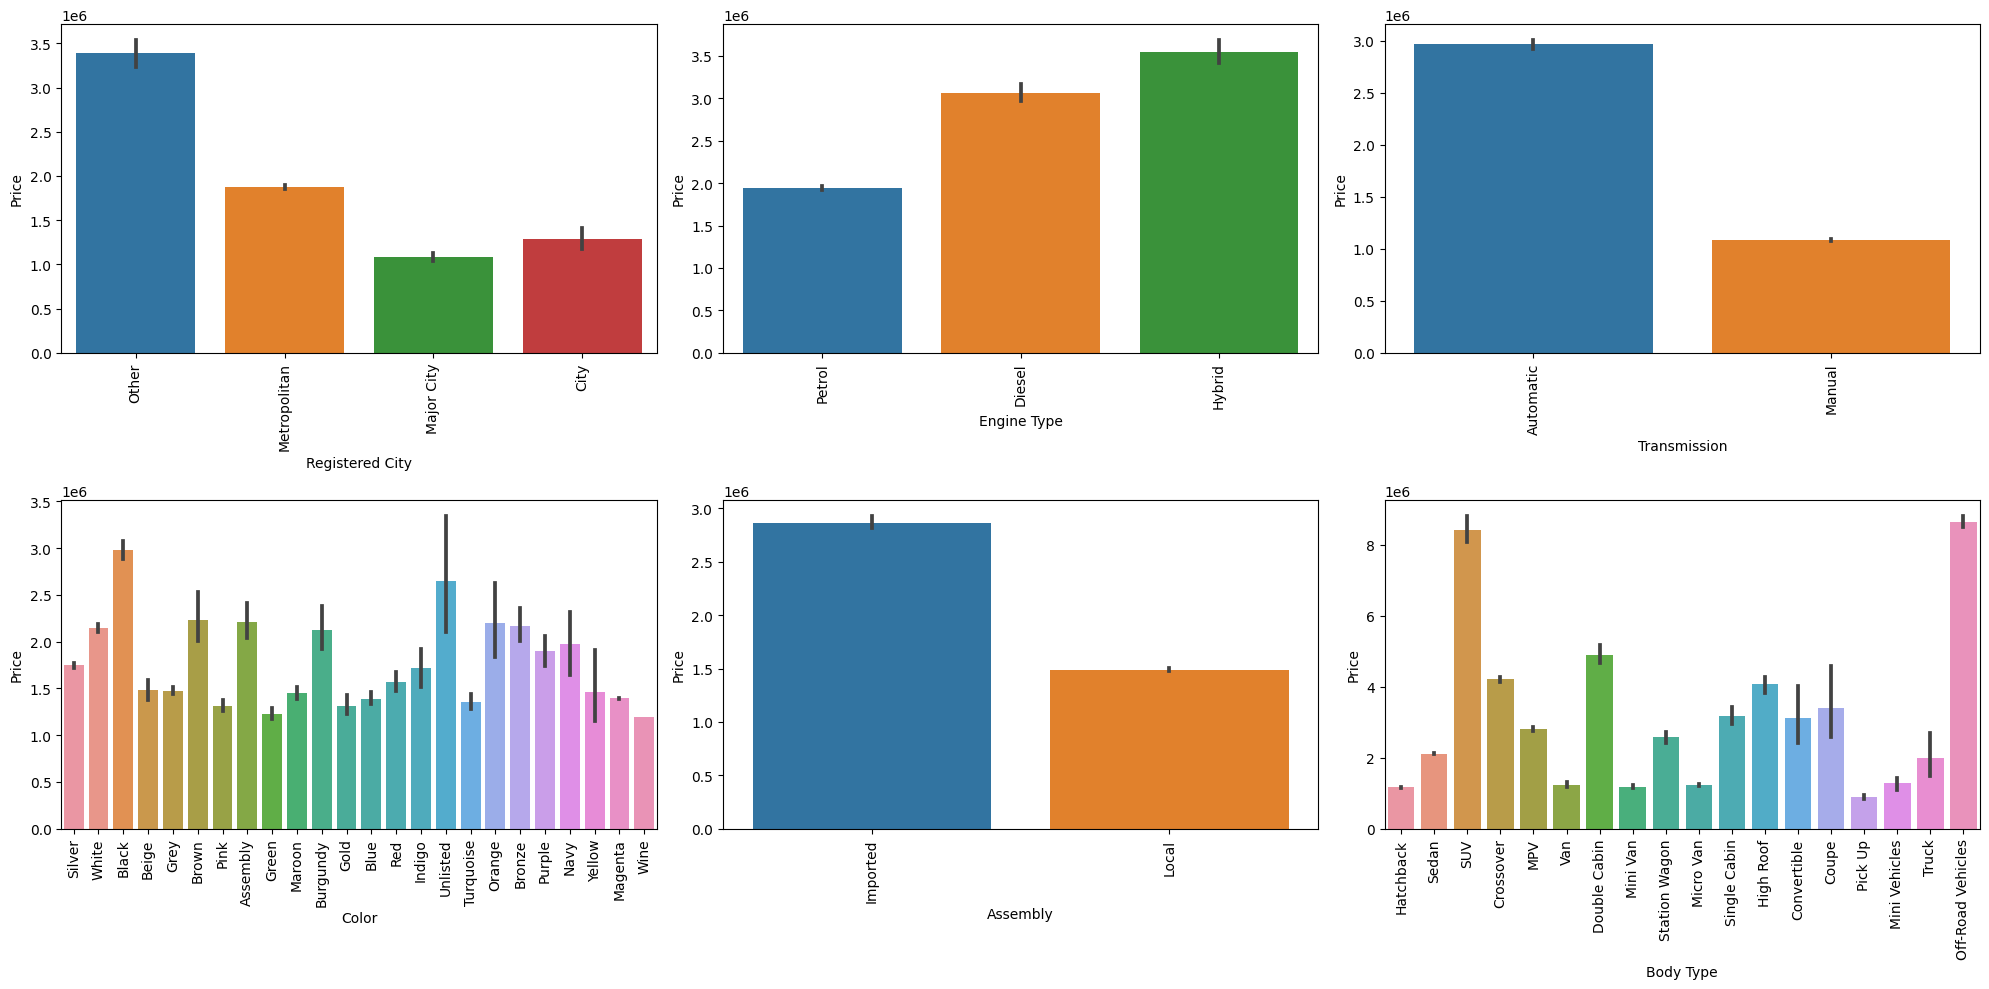

In [ ]:
# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Price', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

## Checking Outliers

## To visualize using a box plot.

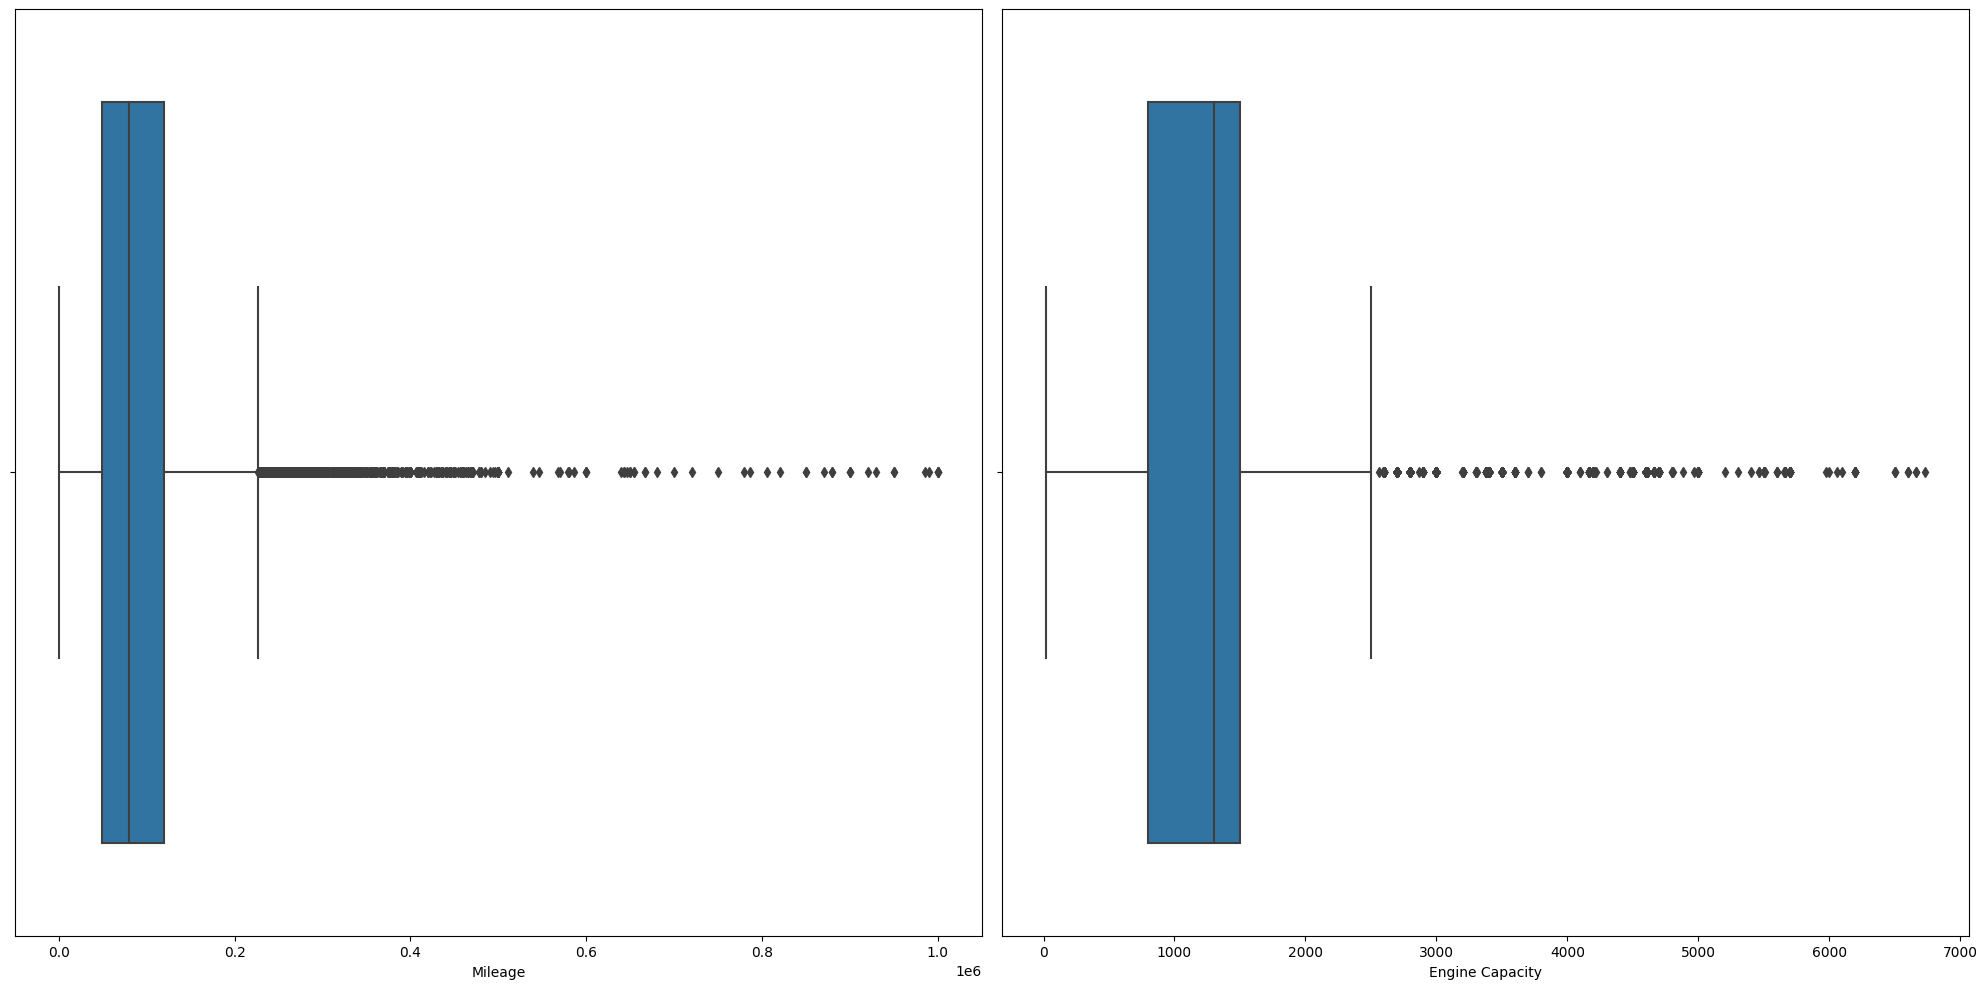

In [ ]:
num_vars_new = ['Mileage', 'Engine Capacity']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars_new):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

## To visualize using a Violin

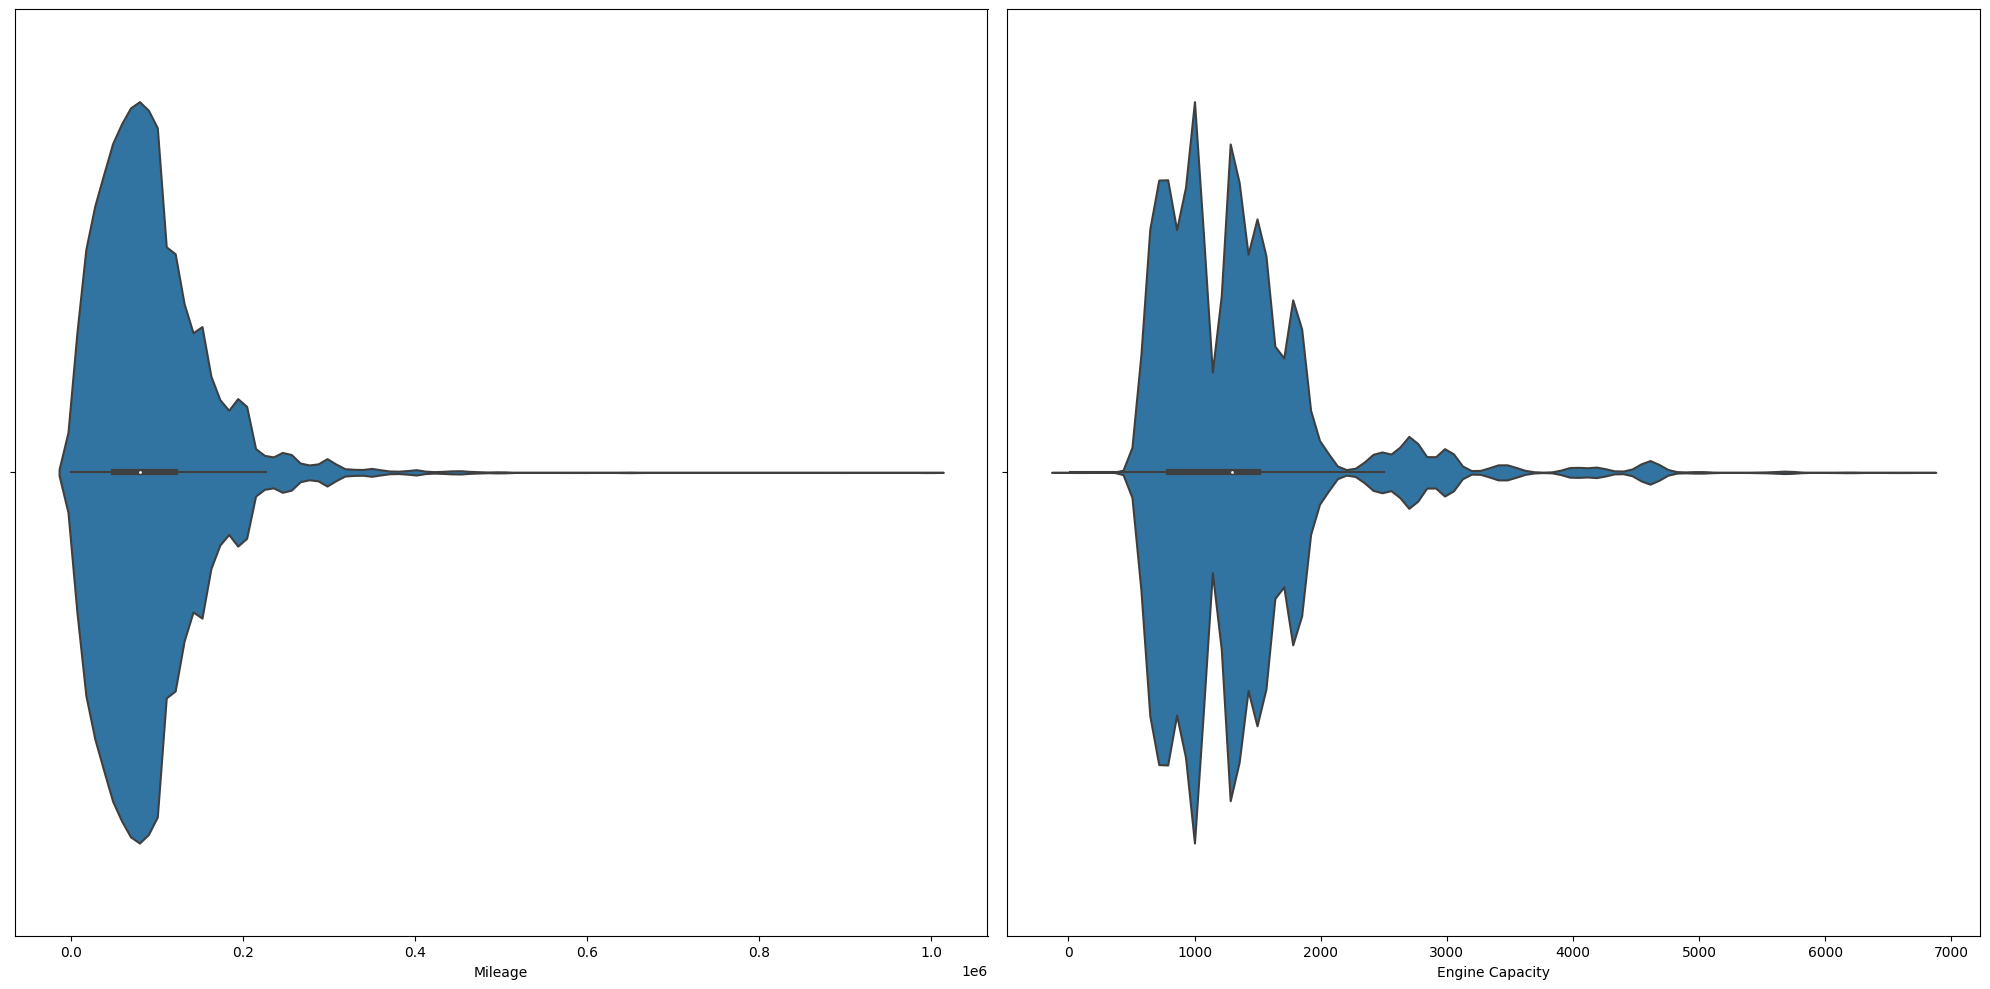

In [ ]:
num_vars_new = ['Mileage', 'Engine Capacity']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars_new):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

## Exploring the Relationship between Price and Model Year and Registered City using a Line Plot.

<ipython-input-29-0c93c70e515c>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Model Year', y='Price', hue='Registered City', data=df, ci=None, estimator='mean', alpha=0.8)


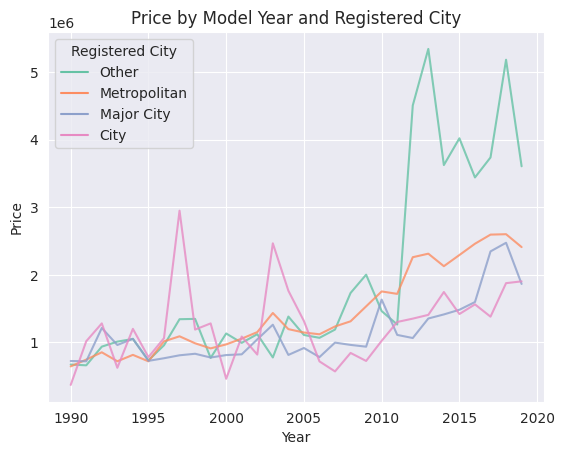

In [ ]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='Model Year', y='Price', hue='Registered City', data=df, ci=None, estimator='mean', alpha=0.8)

plt.title("Price by Model Year and Registered City")
plt.xlabel("Year")
plt.ylabel("Price")

plt.show()

## Exploring the Relationship between Price and Model Year and Transmission using a Line Plot.

<ipython-input-30-46dfe92ed9e3>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Model Year', y='Price', hue='Transmission', data=df, ci=None, alpha=0.8)


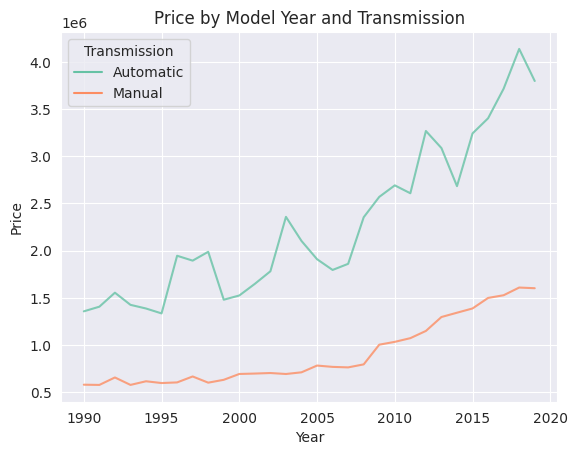

In [ ]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='Model Year', y='Price', hue='Transmission', data=df, ci=None, alpha=0.8)

plt.title("Price by Model Year and Transmission")
plt.xlabel("Year")
plt.ylabel("Price")

plt.show()

## Exploring the Relationship between Price and Model Year and Assembly using a Line Plot.

<ipython-input-31-e25511043fbf>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Model Year', y='Price', hue='Assembly', data=df, ci=None, alpha=0.8)


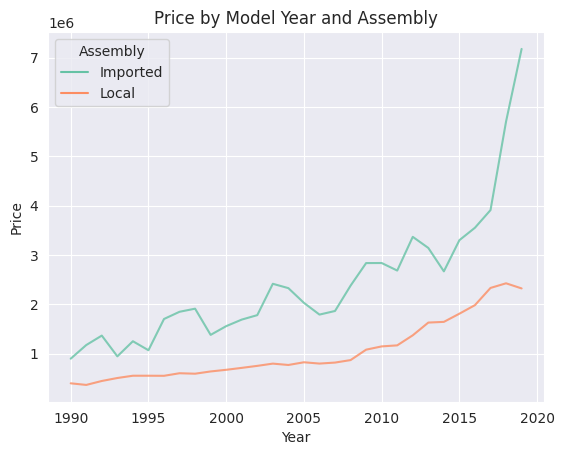

In [ ]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='Model Year', y='Price', hue='Assembly', data=df, ci=None, alpha=0.8)

plt.title("Price by Model Year and Assembly")
plt.xlabel("Year")
plt.ylabel("Price")

plt.show()

## Exploring the Relationship between Price and Model Year and Engine Type using a Line Plot.

<ipython-input-32-0fbe2a0e4263>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Model Year', y='Price', hue='Engine Type', data=df, ci=None, alpha=0.8)


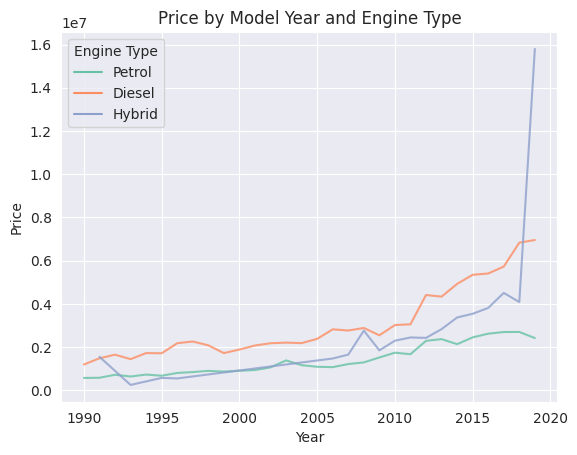

In [ ]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='Model Year', y='Price', hue='Engine Type', data=df, ci=None, alpha=0.8)

plt.title("Price by Model Year and Engine Type")
plt.xlabel("Year")
plt.ylabel("Price")

plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56186 entries, 0 to 56185
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            54913 non-null  float64
 1   Model Year       56186 non-null  int64  
 2   Mileage          56186 non-null  int64  
 3   Registered City  56186 non-null  object 
 4   Engine Type      54904 non-null  object 
 5   Engine Capacity  56186 non-null  int64  
 6   Transmission     56186 non-null  object 
 7   Color            56186 non-null  object 
 8   Assembly         56186 non-null  object 
 9   Body Type        49717 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 4.3+ MB


## Examining the correlation between the column feature and the car prices.

In [ ]:
# using correlation statistical method to find the relation between the price and other features
df.corr()['Price'].sort_values(ascending=False)

<ipython-input-34-ba0f0ff6d6e6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price'].sort_values(ascending=False)


Price              1.000000
Engine Capacity    0.618305
Model Year         0.225947
Mileage           -0.189820
Name: Price, dtype: float64

<ipython-input-35-7da4af059c19>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')


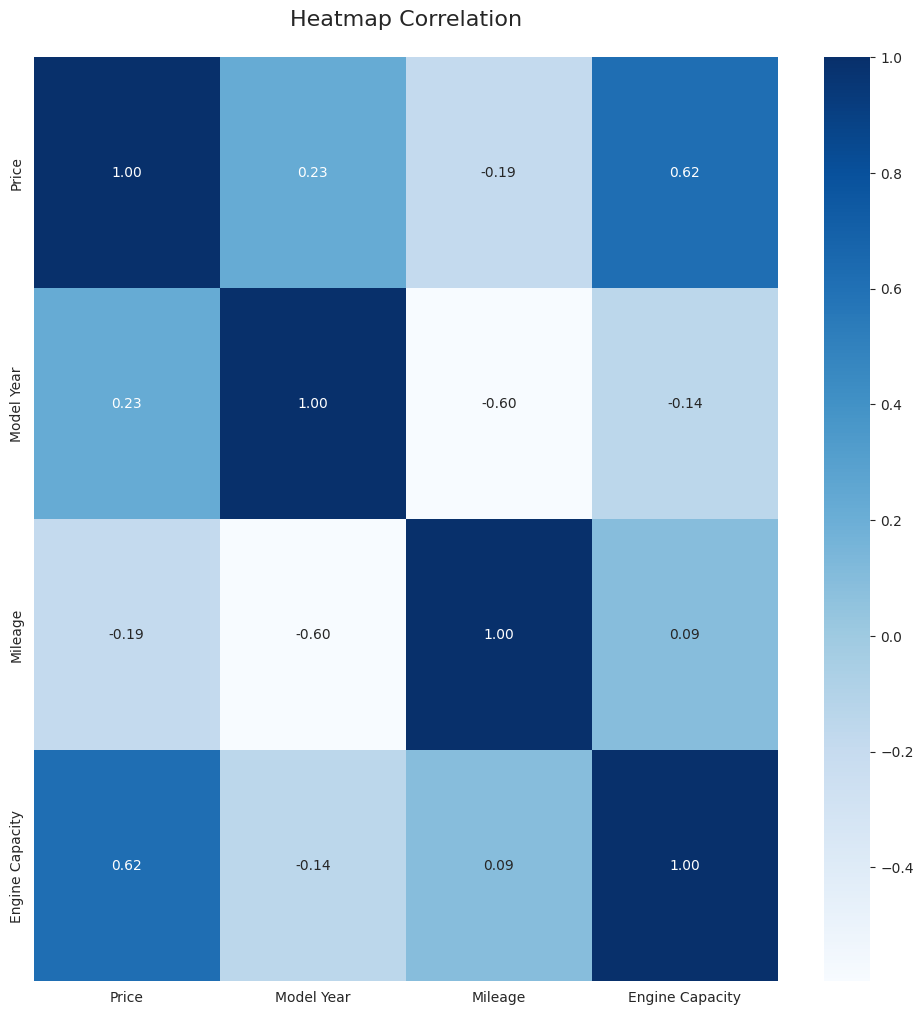

In [ ]:
# melihat korelasi antar kolom numerikal dengan heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title('Heatmap Correlation\n', fontsize=16)
plt.show()

Price              1.000000
Engine Capacity    0.618305
Model Year         0.225947
Mileage            0.189820
Name: Price, dtype: float64


<Axes: xlabel='Engine Capacity', ylabel='Price'>

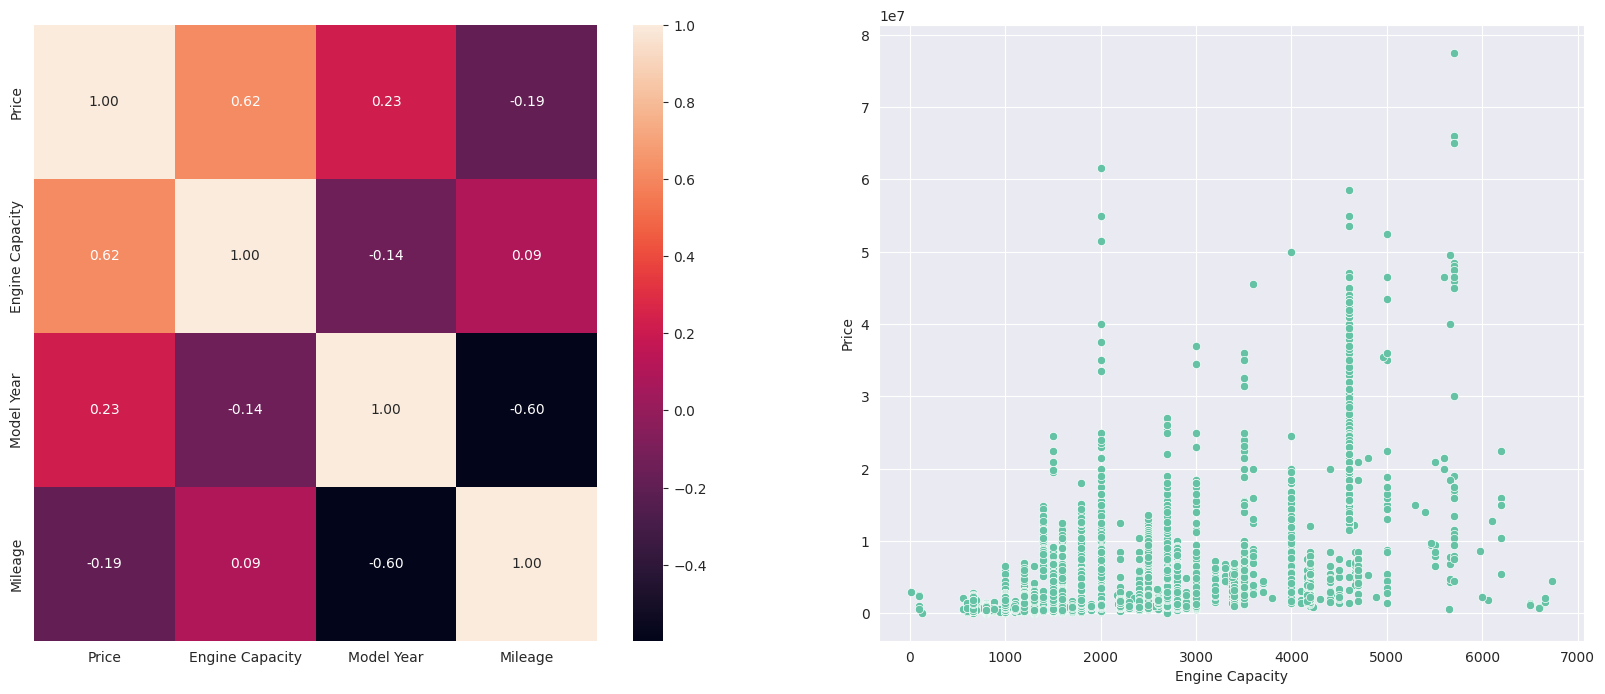

In [ ]:
# Let see the correlation each rating column for price of the car
col = """Price
Engine Capacity
Model Year
Mileage"""
col = col.split('\n')
corr_rate = df[col].corr()
fig = plt.figure(figsize=(20,8))

price_corr = abs(corr_rate['Price'])

print(price_corr.sort_values(ascending=False))

ax1 = fig.add_subplot(121)
sns.heatmap(corr_rate,annot=True,fmt='.2f')

ax2 = fig.add_subplot(122)
sns.scatterplot(df,y='Price',x='Engine Capacity')

# Feature Engineering

In [ ]:
#Missing Value
missing = []
types = []
variables = []
count = []

for item in df.columns :
    variables.append(item)
    missing.append(df[item].isnull().sum())
    types.append(df[item].dtypes)
    count.append(len(df[item]))


output = pd.DataFrame({
    'variable': variables,
    'dtype': types,
    'count': count,
    'missing': missing,
})
output.sort_values("missing",ascending=False).reset_index(drop=True)

,variable,dtype,count,missing
0,Body Type,object,56186,6469
1,Engine Type,object,56186,1282
2,Price,float64,56186,1273
3,Model Year,int64,56186,0
4,Mileage,int64,56186,0
5,Registered City,object,56186,0
6,Engine Capacity,int64,56186,0
7,Transmission,object,56186,0
8,Color,object,56186,0
9,Assembly,object,56186,0


In [ ]:
df.shape

(56186, 10)

In [ ]:
# Remove the null value because its very low
df.dropna(inplace=True)
df.shape

(47564, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47564 entries, 0 to 56185
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            47564 non-null  float64
 1   Model Year       47564 non-null  int64  
 2   Mileage          47564 non-null  int64  
 3   Registered City  47564 non-null  object 
 4   Engine Type      47564 non-null  object 
 5   Engine Capacity  47564 non-null  int64  
 6   Transmission     47564 non-null  object 
 7   Color            47564 non-null  object 
 8   Assembly         47564 non-null  object 
 9   Body Type        47564 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 4.0+ MB


# Label Encoding for each object dataype

In [ ]:
# change the categorical data to be numerical values. So we can use the data for prediction
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Registered City'] = label_encoder.fit_transform(df['Registered City'])
df['Engine Type'] = label_encoder.fit_transform(df['Engine Type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df['Color'] = label_encoder.fit_transform(df['Color'])
df['Assembly'] = label_encoder.fit_transform(df['Assembly'])
df['Body Type'] = label_encoder.fit_transform(df['Body Type'])


## Remove Outlier Using Z-Score

In [ ]:
from scipy import stats

# define a function to remove outliers using z-score for only selected numerical columns
def remove_outliers(df, cols, threshold=3):
    # loop over each selected column
    for col in cols:
        # calculate z-score for each data point in selected column
        z = np.abs(stats.zscore(df[col]))
        # remove rows with z-score greater than threshold in selected column
        df = df[(z < threshold) | (df[col].isnull())]
    return df

In [ ]:
#before removed
df.shape

(47564, 10)

In [ ]:
#after removed
selected_cols = ['Mileage', 'Engine Capacity']
df_clean = remove_outliers(df, selected_cols)
df_clean.shape

(45914, 10)

## Feature Selection

### Correlation Matrix

<Axes: >

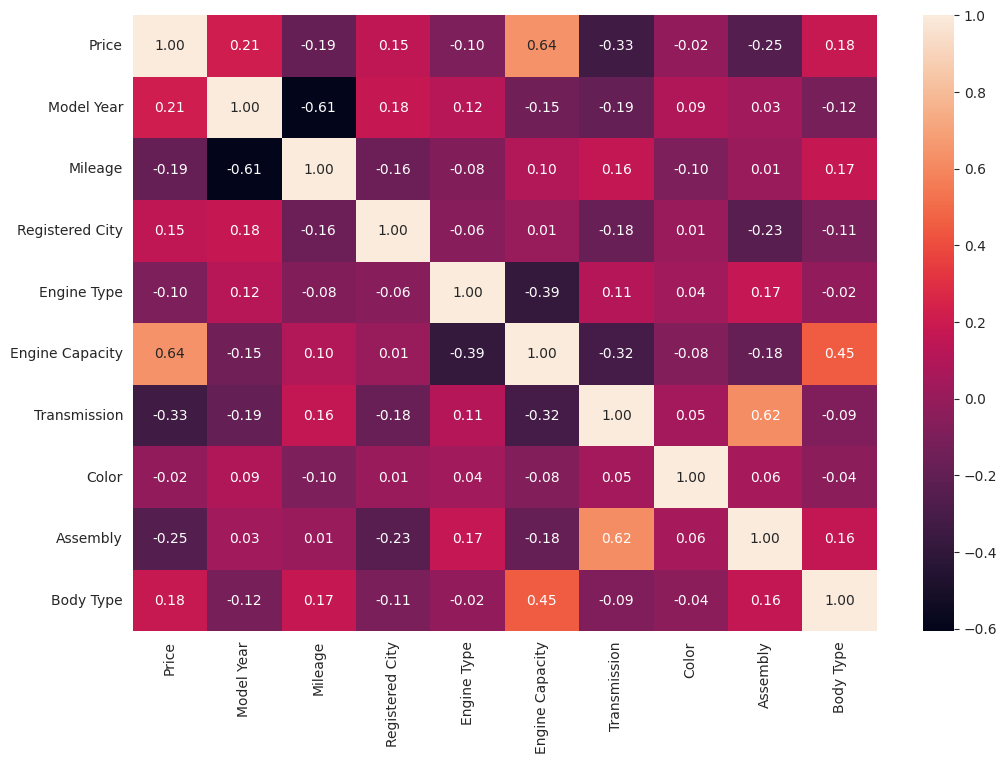

In [ ]:
corr_matrix = df.corr()
fig = plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,fmt='.2f',annot=True)

# Feature Importances

## Recursive feature elimination (RFE) with random forest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = df.drop(columns="Price",axis=1)
y = df['Price']

# Pisahkan data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Rentang pemilihan total fitur (3 hingga 10)
num_features_range = range(3, 11)

# Inisialisasi model Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Inisialisasi variabel untuk menyimpan hasil evaluasi
results = {
    'Num_Features': [],
    'MAE': [],
    'RMSE': [],
    'R2': [],
    'MAPE': []
}


for num_features in num_features_range:
    # Membuat objek RFE dengan model Random Forest
    rfe = RFE(estimator=rf_model, n_features_to_select=num_features)
    # Fitting RFE ke data pelatihan
    rfe.fit(X_train, y_train)


    # Memilih fitur-fitur terpilih
    X_train_selected = rfe.transform(X_train)
    X_test_selected = rfe.transform(X_test)

    # Melatih model pada fitur-fitur terpilih
    rf_model.fit(X_train_selected, y_train)

    # Melakukan prediksi
    y_pred = rf_model.predict(X_test_selected)

    # Menghitung metrik evaluasi
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


    # Menyimpan hasil evaluasi
    results['Num_Features'].append(num_features)
    results['MAE'].append(mae)
    results['RMSE'].append(rmse)
    results['R2'].append(r2)
    results['MAPE'].append(mape)

# Membuat dataframe dari hasil evaluasi
results_df = pd.DataFrame(results)

# Menampilkan hasil evaluasi
print(results_df)


   Num_Features            MAE          RMSE        R2       MAPE
0             3  318962.531665  1.008360e+06  0.893563  16.836361
1             4  333743.675366  1.031598e+06  0.888601  17.673809
2             5  269047.765418  9.211611e+05  0.911175  14.068731
3             6  259368.339548  9.150305e+05  0.912354  13.205171
4             7  253936.890616  9.152514e+05  0.912311  12.899662
5             8  250436.227430  8.992885e+05  0.915344  12.798181
6             9  251411.675764  9.113216e+05  0.913063  12.805961
7            10  251411.675764  9.113216e+05  0.913063  12.805961


In [ ]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores))

Number of features:  3
['Model Year', 'Mileage', 'Engine Capacity']
Number of features:  4
['Model Year', 'Mileage', 'Engine Capacity', 'Body Type']
Number of features:  5
['Model Year', 'Mileage', 'Engine Capacity', 'Assembly', 'Body Type']
Number of features:  6
['Model Year', 'Mileage', 'Engine Capacity', 'Color', 'Assembly', 'Body Type']
Number of features:  7
['Model Year', 'Mileage', 'Engine Capacity', 'Transmission', 'Color', 'Assembly', 'Body Type']
Number of features:  8
['Model Year', 'Mileage', 'Registered City', 'Engine Capacity', 'Transmission', 'Color', 'Assembly', 'Body Type']
Number of features:  9
['Model Year', 'Mileage', 'Registered City', 'Engine Type', 'Engine Capacity', 'Transmission', 'Color', 'Assembly', 'Body Type']
Number of features:  10
['Model Year', 'Mileage', 'Registered City', 'Engine Type', 'Engine Capacity', 'Transmission', 'Color', 'Assembly', 'Body Type']


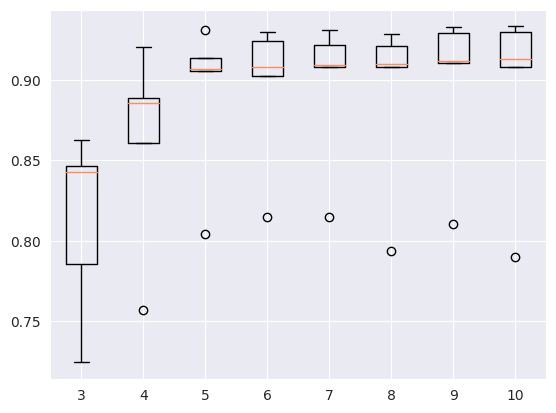

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold, cross_val_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
X = df.drop(columns="Price",axis=1)
y = df['Price']

std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

results=[]
num_feat=[]
for i in range(3,11):
    model = RandomForestRegressor()
    rfe = RFE(estimator=model,n_features_to_select=i,step=5)
    rfe.fit(X_std, y)
    X_temp = X[X.loc[:,rfe.support_].columns.tolist()]


    scores = cross_val_score(model, X_temp, y, scoring="r2", cv=5)
    print("Number of features: ",i)
    print(X.loc[:,rfe.support_].columns.tolist())

    num_feat.append(i)
    results.append((scores))
    print("=====================")
plt.boxplot(results,labels=num_feat)
plt.show()
#     print(X[rfe.support_])

# Machine Learning Model Building

In [ ]:
X = df[['Model Year', 'Mileage', 'Registered City', 'Engine Capacity', 'Transmission', 'Color', 'Assembly', 'Body Type']]
y = df_clean['Price']


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
## DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=0)
ada.fit(X_train, y_train)

AdaBoostRegressor(random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Algoritma Machine Learning

dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
ada = AdaBoostRegressor(random_state=0)
regressor = LinearRegression()


models = [dt, rf, ada, regressor]

In [ ]:
results = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'R2 Score', 'RMSE'])

In [ ]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = math.sqrt(mse)
    results = results.append({'Model': str(model), 'MAE': mae, 'MSE': mse, 'R2 Score': r2, 'RMSE': rmse}, ignore_index=True)

<ipython-input-56-2f3dc0f1f4c2>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': str(model), 'MAE': mae, 'MSE': mse, 'R2 Score': r2, 'RMSE': rmse}, ignore_index=True)
<ipython-input-56-2f3dc0f1f4c2>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': str(model), 'MAE': mae, 'MSE': mse, 'R2 Score': r2, 'RMSE': rmse}, ignore_index=True)
<ipython-input-56-2f3dc0f1f4c2>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': str(model), 'MAE': mae, 'MSE': mse, 'R2 Score': r2, 'RMSE': rmse}, ignore_index=True)
<ipython-input-56-2f3dc0f1f4c2>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

In [ ]:
# Menampilkan hasil dalam bentuk tabel
print(results)

                                   Model           MAE           MSE  \
0  DecisionTreeRegressor(random_state=0)  2.992564e+05  1.169250e+12   
1  RandomForestRegressor(random_state=0)  2.520977e+05  8.265746e+11   
2      AdaBoostRegressor(random_state=0)  1.803671e+06  4.656727e+12   
3                     LinearRegression()  8.681519e+05  4.304903e+12   

   R2 Score          RMSE  
0  0.877603  1.081319e+06  
1  0.913475  9.091615e+05  
2  0.512536  2.157945e+06  
3  0.549365  2.074826e+06  
